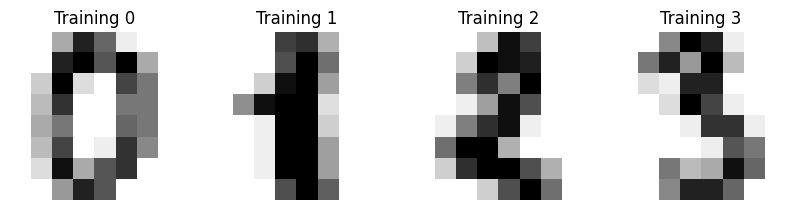

In [37]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

fig, axes = plt.subplots(nrows= 1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training {label}")


In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
import numpy as np
X_digits, Y_digits = load_digits(return_X_y=True)

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, test_size=0.5)

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
log = LogisticRegressionCV(penalty="l2", max_iter=10000)

knn.fit(scaled_X_train, Y_train)
log.fit(scaled_X_train, Y_train)

Y_knn = knn.predict(scaled_X_test)
Y_log = log.predict(scaled_X_test)

print(classification_report(Y_test, Y_knn))
print(classification_report(Y_test, Y_log))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        91
           1       0.95      1.00      0.97        88
           2       1.00      0.97      0.98        97
           3       0.98      0.98      0.98        96
           4       1.00      1.00      1.00        85
           5       0.98      1.00      0.99        91
           6       1.00      1.00      1.00        98
           7       0.99      0.99      0.99        93
           8       0.97      0.96      0.97        80
           9       0.99      0.94      0.96        80

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.91      0.92      0.92        88
           2       0.98      0.99      0.98        97
           3       0.99 

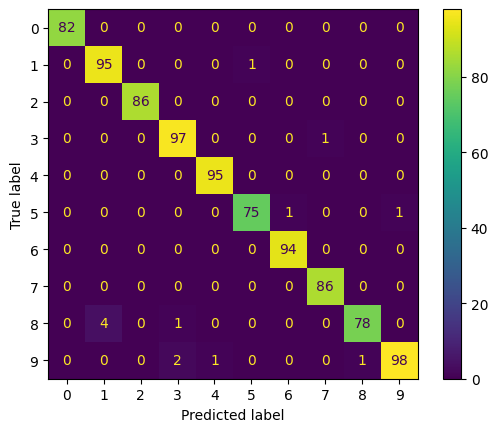

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(Y_test, Y_knn)
ConfusionMatrixDisplay(cm).plot()

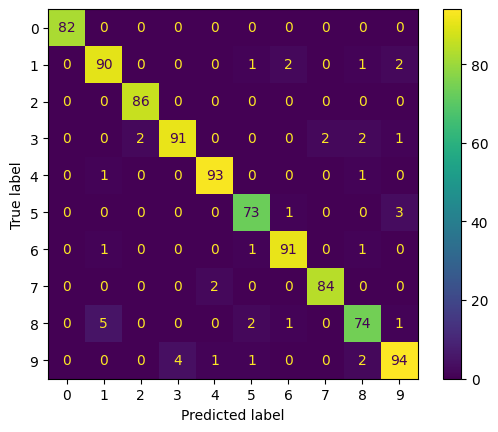

In [40]:
cm = confusion_matrix(Y_test, Y_log)
ConfusionMatrixDisplay(cm).plot()

[Text(0.5, 1.0, 'Elbow'), Text(0.5, 0, 'k'), Text(0, 0.5, 'Error')]

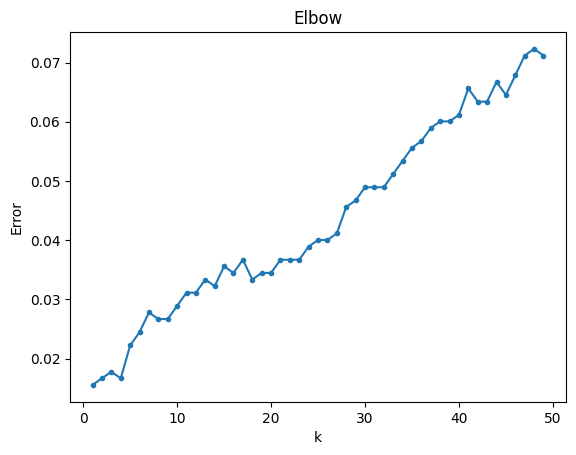

In [47]:
from sklearn.metrics import accuracy_score

error = 1 - accuracy_score(Y_test, Y_knn)
error_list = list()

for k in range(1, 50):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(scaled_X_train, Y_train)
    Y_hat = model_KNN.predict(scaled_X_test)
    error_list += [1-accuracy_score(Y_test, Y_hat)]

fig, ax = plt.figure(), plt.axes()

ax.plot(range(1, len(error_list)+1), error_list, ".-")
ax.set(title="Elbow", xlabel="k", ylabel="Error")
    